In [15]:
from contamination_detection import *
from matplotlib import pyplot as plt
import cv2
import pickle
from sklearn.ensemble import GradientBoostingClassifier

## Path of the image

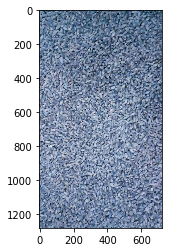

In [16]:
path = "/home/natalija/Documents/HackZurich/contamination_detection/src/no_contamination2.jpg"
img = cv2.imread(path)
plt.imshow(img)
plt.show()

## Is there contamination in this image? 

In [17]:
contamination_percentage = contamination(path)
print("There is {}% of the content that is contaminated".format(contamination_percentage))

There is 1.9152560763888937% of the content that is contaminated


## Load trained model and take features for image

In [18]:
loaded_model = pickle.load(open("/home/natalija/Documents/HackZurich/contamination_detection/model.pkl", 'rb'))
features = vector_feature_generation(path)

In [19]:
result = loaded_model.predict(features)

In [20]:
maping = {}
maping[1] = "beans"
maping[2] = "dried_bean"
maping[3] = "fines"
maping[4] = "grains"
maping[5] = "lentils"
maping[6] = "pumpkin"
maping[7] = "stones"
maping[8] = "straw"
maping[9] = "quinoa"

count = {}
count[1] = 0
count[2] = 0
count[3] = 0
count[4] = 0
count[5] = 0
count[6] = 0
count[7] = 0
count[8] = 0
count[9] = 0

for i in result:
    count[i] +=1

In [21]:
for i in range(1,10): 
    if count[i] != 0 and i!=4: 
        print("{}% of the grains are {}".format(contamination_percentage/count[i], maping[i]))

0.9576280381944469% of the grains are beans
0.03420100136408739% of the grains are pumpkin
0.08705709438131336% of the grains are straw
